In [0]:
!kill -9 -1

In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [5]:
!pip3 install torch torchvision
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python
!pip3 install --no-cache-dir -I pillow


In [0]:
!pip3 install --upgrade pip

In [0]:
import tensorflow as tf
tf.test.gpu_device_name()

In [0]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

In [1]:
!cat /proc/meminfo

MemTotal:       13335192 kB
MemFree:         2748032 kB
MemAvailable:   12363028 kB
Buffers:          175760 kB
Cached:          9377972 kB
SwapCached:            0 kB
Active:          1581656 kB
Inactive:        8368156 kB
Active(anon):     360056 kB
Inactive(anon):   164768 kB
Active(file):    1221600 kB
Inactive(file):  8203388 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               324 kB
Writeback:             0 kB
AnonPages:        396136 kB
Mapped:           182808 kB
Shmem:            254960 kB
Slab:             552580 kB
SReclaimable:     516148 kB
SUnreclaim:        36432 kB
KernelStack:        3712 kB
PageTables:         5652 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6667596 kB
Committed_AS:    2068396 kB
VmallocTotal:   34359738367 kB
VmallocUsed:           0 kB
VmallocChunk:          0 kB
AnonHugePages:         0 kB
ShmemHugePages:  

In [2]:
!nvidia-smi

Tue Jul 24 11:16:43 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 384.111                Driver Version: 384.111                   |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P8    28W / 149W |      1MiB / 11439MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [4]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2300.000
cache size	: 46080 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid pni pclmulqdq ssse3 fma cx16 sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm pti fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms xsaveopt
bugs		: cpu_meltdown spectre_v1 spectre_v2
bogomips	: 4600.00
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 bits virtual
power management:

processor	: 1
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x

In [1]:
!ls drive/Collab/
import os
os.chdir("drive/Collab")

deep_dream_pytorch  hello_collab.ipynb	mnist_cnn.py


In [0]:
print('Setup complete')

In [2]:
os.chdir("deep_dream_pytorch")
!ls

dogs  me1.jpg  me.jpg  ome1.jpg  ome2.jpg  setup.ipynb


In [0]:
#Begin deep_dream
import torch
import torch.nn as nn
from torch.autograd import Variable
from torchvision import models
from torchvision import transforms, utils
import numpy as np
from PIL import Image, ImageFilter, ImageChops

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
net = models.vgg16
net = net(pretrained=True).cuda()
print(net)
modulelist = list(net.features.modules())

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

In [0]:
def load_image(path):
  image = Image.open(path)
  plt.imshow(image)
  plt.title("Image loaded successfully")
  return image

preprocess = transforms.Compose([transforms.Resize(448),
                                 transforms.ToTensor(),
                                 transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                      std=[0.229, 0.224, 0.225])]) 
def deprocess(image):
    return image * torch.Tensor([0.229, 0.224, 0.225]).cuda()  + torch.Tensor([0.485, 0.456, 0.406]).cuda()
  

In [0]:
def gradient_ascent(image, layer, iterations, lr):
  input = Variable(preprocess(image).unsqueeze(0).cuda(), requires_grad=True)
  net.zero_grad()
  for i in range(iterations):
    out = input
    for j in range(layer):
      out = modulelist[j+1](out)
      loss = out.norm()
      loss.backward(retain_graph=True)
      input.data = input.data + lr * input.grad.data
      
  input = input.data.squeeze()
  input.transpose_(0,1)
  input.transpose_(1,2)
  input = np.clip(deprocess(input),0,1)
  im = Image.fromarray(np.uint8(input*255))
  return im


In [0]:

def octaves(image, layer, iterations, lr, octave_scale, num_octaves):
  if num_octaves>0:
    image1 = image.filter(ImageFilter.GaussianBlur(2))
    if (image1.size[0]/octave_scale<1 or image1.size[1]/octave_scale<1):
      size = image1.size
    else:
      size = (int(image1.size[0]/octave_scale), int(image1.size[1]/octave_scale))
    
    image1 =  image1.resize(size, Image.ANTIALIAS)
    image1 = octaves(image1, layer, iterations, lr, octave_scale, num_octaves-1)
    size = (image.size[0], image.size[1])
    image1 = image1.resize(size, Image.ANTIALIAS)
    image = ImageChops.blend(image, image1, 0.6)
    print("---Octave Level : {} ---".format(num_octaves))
  img_result = gradient_ascent(image, layer, iterations, lr)
  img_result.resize(image.size)
  plt.imshow(img_result)
  return img_result

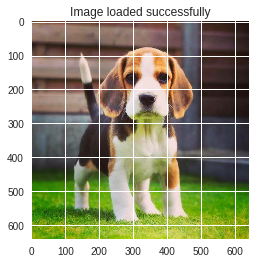

In [22]:
me = load_image("beagle.jpg")

---Octave Level : 1 ---
---Octave Level : 2 ---


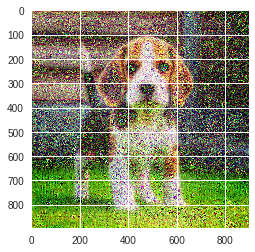

In [16]:
me_24_2 = octaves(me, 28, 7, 0.001, 4, 2)
me_24_2.save('me5.jpg')
del me_24_2

---Octave Level : 1 ---
---Octave Level : 2 ---


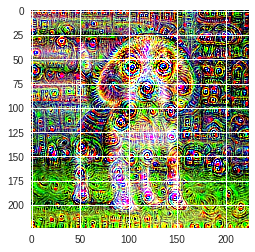

In [22]:
me_28_2o = octaves(me, 28, 5, 0.001, 4, 2)

---Octave Level : 1 ---
---Octave Level : 2 ---
---Octave Level : 3 ---
---Octave Level : 4 ---
---Octave Level : 5 ---
---Octave Level : 6 ---
---Octave Level : 7 ---
---Octave Level : 8 ---
---Octave Level : 9 ---
---Octave Level : 10 ---
---Octave Level : 11 ---
---Octave Level : 12 ---
---Octave Level : 13 ---
---Octave Level : 14 ---
---Octave Level : 15 ---
---Octave Level : 16 ---
---Octave Level : 17 ---
---Octave Level : 18 ---
---Octave Level : 19 ---
---Octave Level : 20 ---


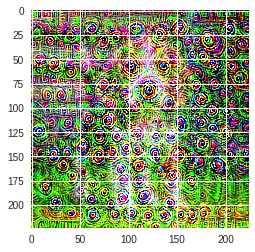

In [17]:
me_28 = octaves(me, 28, 5, 0.001, 4, 20)

---Octave Level : 1 ---
---Octave Level : 2 ---
---Octave Level : 3 ---
---Octave Level : 4 ---
---Octave Level : 5 ---
---Octave Level : 6 ---
---Octave Level : 7 ---
---Octave Level : 8 ---
---Octave Level : 9 ---
---Octave Level : 10 ---
---Octave Level : 11 ---
---Octave Level : 12 ---
---Octave Level : 13 ---
---Octave Level : 14 ---
---Octave Level : 15 ---
---Octave Level : 16 ---
---Octave Level : 17 ---
---Octave Level : 18 ---
---Octave Level : 19 ---
---Octave Level : 20 ---


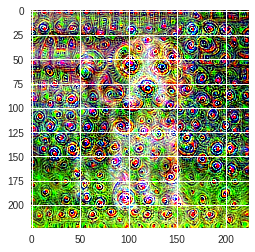

In [19]:
me_24 = octaves(me, 24, 5, 0.001, 4, 20)

---Octave Level : 1 ---


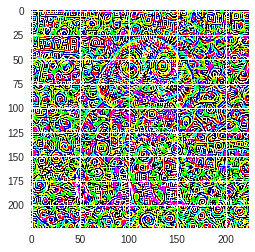

In [14]:
me_5 = octaves(me, 28, 9, 0.01, 4, 1)

In [0]:
me_24.save('layer24.jpg')
me_5.save('layer5.jpg')
me_28.save('layer28_20octaves.jpg')
me_28_2o.save('layer28_2octaves.jpg')
del me_24
del me_5
del me_28
del me_28_2o

---Octave Level : 1 ---
---Octave Level : 2 ---
---Octave Level : 3 ---
---Octave Level : 4 ---
---Octave Level : 5 ---
---Octave Level : 6 ---


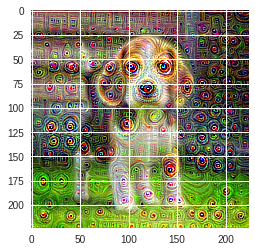

In [37]:
me_24_4 = octaves(me, 24, 10, 0.0001, 4, 6)

---Octave Level : 1 ---
---Octave Level : 2 ---
---Octave Level : 3 ---
---Octave Level : 4 ---
---Octave Level : 5 ---
---Octave Level : 6 ---


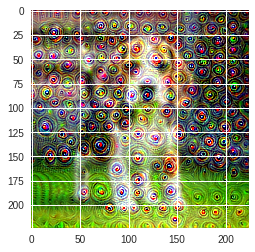

In [28]:
me_24 = octaves(me, 24, 10, 0.0001, 2, 6)

---Octave Level : 1 ---
---Octave Level : 2 ---
---Octave Level : 3 ---
---Octave Level : 4 ---
---Octave Level : 5 ---
---Octave Level : 6 ---


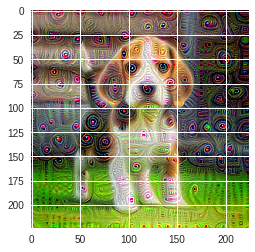

In [36]:
me_24_3 = octaves(me, 19, 10, 0.0001, 2, 6)

---Octave Level : 1 ---
---Octave Level : 2 ---
---Octave Level : 3 ---


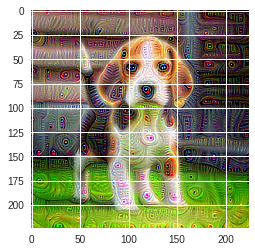

In [33]:
me_24_2 = octaves(me, 19, 10, 0.0001, 2, 3)

---Octave Level : 1 ---
---Octave Level : 2 ---
---Octave Level : 3 ---


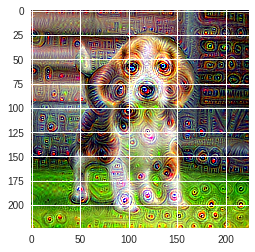

In [35]:
me_24_1 = octaves(me, 22, 10, 0.0001, 2, 3)

---Octave Level : 1 ---
---Octave Level : 2 ---
---Octave Level : 3 ---


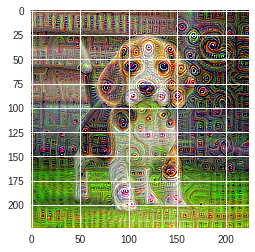

In [38]:
me_24_5 = octaves(me, 22, 10, 0.0001, 8, 3)

---Octave Level : 1 ---
---Octave Level : 2 ---


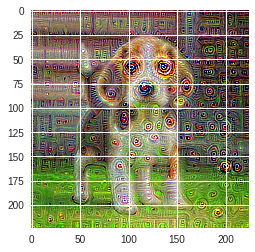

In [39]:
me_24_6 = octaves(me, 22, 10, 0.0001, 16, 2)

In [0]:
me_24.save('l24.jpg')
me_24_1.save('l241.jpg')
me_24_2.save('l242.jpg')
me_24_3.save('l243.jpg')
me_24_4.save('l244.jpg')
me_24_5.save('l245.jpg')
me_24_6.save('l246.jpg')

del me_24
del me_24_1
del me_24_2
del me_24_3
del me_24_4
del me_24_5
del me_24_6

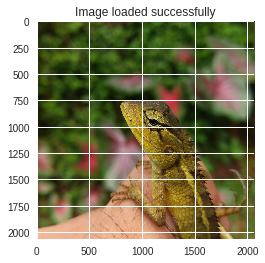

In [17]:
me = load_image('chameleon.jpg')

---Octave Level : 1 ---
---Octave Level : 2 ---
---Octave Level : 3 ---


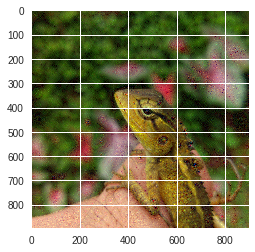

In [19]:
me_24_2 = octaves(me, 28, 7, 0.0001, 2, 3)
me_24_2.save('chame.jpg')
del me_24_2

---Octave Level : 1 ---
---Octave Level : 2 ---


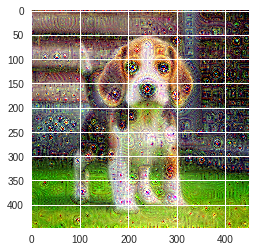

In [24]:
me_24_2 = octaves(me, 26, 12, 0.0001, 4, 2)
me_24_2.save('beagloo.jpg')
del me_24_2